In [2]:
import numpy as np
import pandas as pd 
from sklearn import preprocessing

import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder


# 0. Idée de manoeuvre pré-majoration

Y a eu un kaggle sur le sujet, on va donc s'en inspirer. (ce n'est pas le même dataset)
Voici le lien du kaggle: https://www.kaggle.com/c/home-credit-default-risk/overview

Voici un notebook introductif: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

Voici un notebook avec un bon score: https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features

J'ai bien envie de combiner un neural network et un XGBoost, en général c'est bénèf. 

# 1. Exploration of the data

In [3]:
data = pd.read_csv('data/CreditTraining.csv')
data.head()

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D


In [4]:
data

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D
5,3858,0,Existing Client,04/03/1983,15/09/2011,NP_Client,University,Married,0.0,28,60,2.0,C,04/10/2011,Sales,Old rent,1,NaN,C
6,2189,0,Non Existing Client,25/09/1979,17/07/2011,NP_Client,University,Married,0.0,10,36,1.0,C,28/07/2011,Sales,Owned,1,NaN,B
7,9338,0,Non Existing Client,04/10/1953,11/04/2012,NP_Client,University,Married,0.0,15,36,1.0,C,12/04/2012,Sales,Owned,1,16/04/2013,B
8,9578,0,Existing Client,01/03/1974,20/02/2001,NP_Client,University,Single,0.0,0,500,3.0,P,02/04/2012,Branch,Owned,1,NaN,E
9,173,1,Existing Client,13/02/1963,27/04/2011,NP_Client,University,Married,4.0,35,"87,6",2.0,C,03/05/2011,Sales,Owned,1,18/11/2012,L


On a un problème avec Net_Annual_Income qui est pas enregistré en float, ce qui est pas très pratique. Le problème c'est que pour l'enregistrer en float il faut changer les ',' en '.'.

In [5]:
data['Net_Annual_Income'] = data['Net_Annual_Income'].str.replace(',', '.').astype(float)

In [6]:
data.astype({'Net_Annual_Income': 'float64'}).dtypes

Id_Customer              int64
Y                        int64
Customer_Type           object
BirthDate               object
Customer_Open_Date      object
P_Client                object
Educational_Level       object
Marital_Status          object
Number_Of_Dependant    float64
Years_At_Residence       int64
Net_Annual_Income      float64
Years_At_Business      float64
Prod_Sub_Category       object
Prod_Decision_Date      object
Source                  object
Type_Of_Residence       object
Nb_Of_Products           int64
Prod_Closed_Date        object
Prod_Category           object
dtype: object

In [7]:
data.dtypes

Id_Customer              int64
Y                        int64
Customer_Type           object
BirthDate               object
Customer_Open_Date      object
P_Client                object
Educational_Level       object
Marital_Status          object
Number_Of_Dependant    float64
Years_At_Residence       int64
Net_Annual_Income      float64
Years_At_Business      float64
Prod_Sub_Category       object
Prod_Decision_Date      object
Source                  object
Type_Of_Residence       object
Nb_Of_Products           int64
Prod_Closed_Date        object
Prod_Category           object
dtype: object

On trace des histogrammes pour les variables continues, voir si on observe quelque chose, peut-être des outliers...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a12e855c0>]],
      dtype=object)

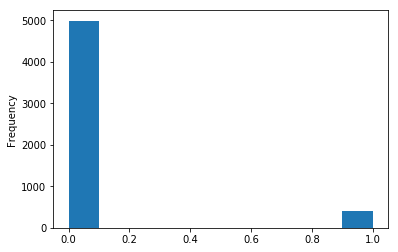

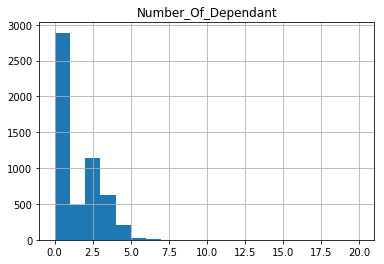

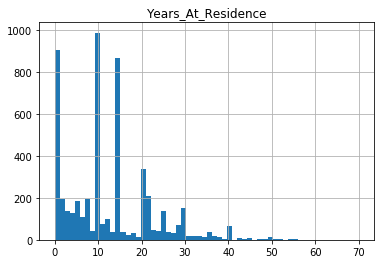

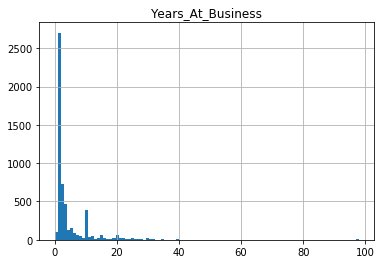

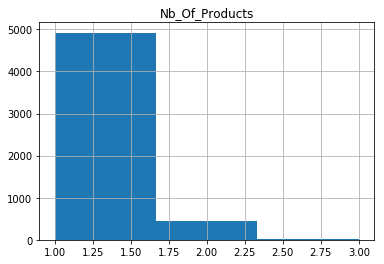

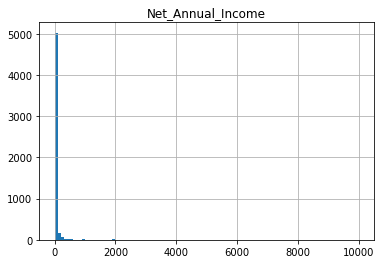

In [8]:
data['Y'].astype(int).plot.hist();

data.hist(column = 'Number_Of_Dependant', bins = 20)
data.hist(column = 'Years_At_Residence', bins = 60)
data.hist(column = 'Years_At_Business', bins = 100)
data.hist(column = 'Nb_Of_Products', bins = 3)
data.hist(column = 'Net_Annual_Income',bins = 100)

Intéressant de remarquer que pour la catégorie 'Years_At_Residence' on a des gros regroupements autour de 10,20 et 30, comme si on avait une grosse partie de gens qui arrondissaient sur ces valeurs là, peut-être que ca induit un certain biais.

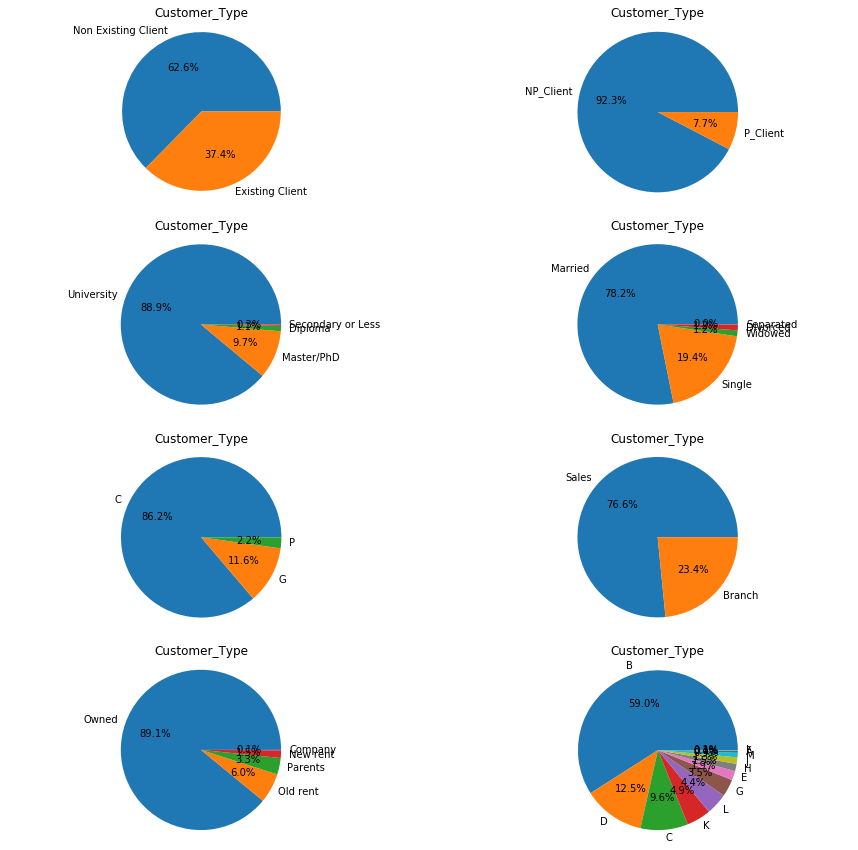

In [27]:
Categorical_Values = ['Customer_Type', 'P_Client', 'Educational_Level', 'Marital_Status','Prod_Sub_Category',
                     'Source', 'Type_Of_Residence', 'Prod_Category']

fig, axs = plt.subplots(4, 2, figsize=(15, 15))
for i in range(len(Categorical_Values)):
    cat = Categorical_Values[i]
    serie = data[cat].value_counts()
    labels = list(serie.index.values)
    sizes = list(serie.values)
    
    axs[i//2,i%2].pie(serie, labels = labels,autopct='%1.1f%%')
    axs[i//2,i%2].set_title('Customer_Type')
    axs[i//2,i%2].axis('equal')
    
plt.show()   

On regarde aussi une description de tout ce qu'on a en variables categorielles (sauf les dates) pour voir la répartition de ce qu'on a.

La commande suivante permet de compter le nombre de valeurs manquantes pour chaque colonne.

In [9]:
data.isna().sum()

Id_Customer               0
Y                         0
Customer_Type             0
BirthDate                 0
Customer_Open_Date        0
P_Client                  0
Educational_Level         0
Marital_Status            0
Number_Of_Dependant       2
Years_At_Residence        0
Net_Annual_Income         2
Years_At_Business         2
Prod_Sub_Category         0
Prod_Decision_Date        0
Source                    0
Type_Of_Residence         0
Nb_Of_Products            0
Prod_Closed_Date       4206
Prod_Category             0
dtype: int64

### Traitement des outliers pour 'Years_At_Business'

In [10]:
data['Years_At_Business'].describe()

count    5378.000000
mean        4.266270
std         7.225926
min         0.000000
25%         1.000000
50%         1.000000
75%         4.000000
max        98.000000
Name: Years_At_Business, dtype: float64

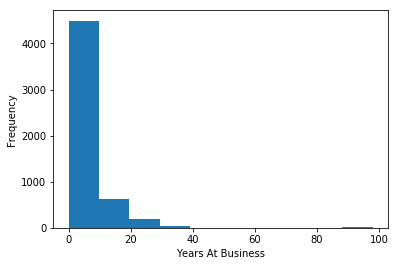

In [11]:
data['Years_At_Business'].plot.hist();
plt.xlabel('Years At Business');

In [18]:
outliers = data[data['Years_At_Business'] >= 90]
print('There seem to be '+ str(len(outliers)) + ' outliers.')

There seem to be 10 outliers.


# 2. Data transformation 

## Label-encoding

Pour certaines variables, on peut simplement faire du Label encoding, comme par exemple pour la première colonne : Customer_Type, ou on va considérer Existing Client = 0, non existing client = 1. Pour être plus efficace, on va effetctuer un label encoding pour toutes les variables categorielles qui ont seulement 2 categories.

In [4]:
le = preprocessing.LabelEncoder()
le.fit(data['Customer_Type'])

LabelEncoder()

In [5]:
list(le.classes_)

['Existing Client', 'Non Existing Client']

In [7]:
le.transform(data['Customer_Type']) 

array([1, 0, 1, ..., 1, 1, 1])

In [9]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


## One-hot encoding

Ici c'est simple, il existe une fonction pandas déjà écrite pour ca.

In [11]:
data = pd.get_dummies(data)

### Removing outliers

Here we remove outliers by replacing their value to a NaN.

In [19]:
data["Years_At_Business"].replace({97: np.nan}, inplace = True)
data["Years_At_Business"].replace({98: np.nan}, inplace = True)


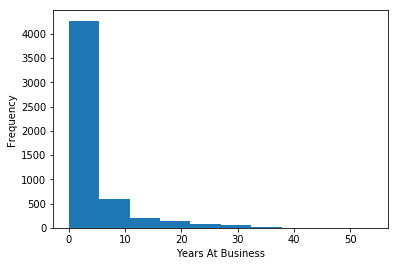

In [21]:
data['Years_At_Business'].plot.hist();
plt.xlabel('Years At Business');

MUCH BETTER

# 3. Data split 

# 4. Comparison of different models 

# 5. Tuning of the model 

# 6. Conclusion 

In [27]:
import numpy as np
import pandas as pd 

from tqdm import tqdm

import datetime

%matplotlib inline 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics

# 0. Idée de manoeuvre pré-majoration

Y a eu un kaggle sur le sujet, on va donc s'en inspirer. (ce n'est pas le même dataset)
Voici le lien du kaggle: https://www.kaggle.com/c/home-credit-default-risk/overview

Voici un notebook introductif: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

Voici un notebook avec un bon score: https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features

J'ai bien envie de combiner un neural network et un XGBoost, en général c'est bénèf. 

# 1. Exploration and transformation of the data

## 1.1. A first glance at the data 

In [121]:
data = pd.read_csv('data/CreditTraining.csv', parse_dates=[3, 4, 13, 17])
data.head(5)

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,1977-07-08,2012-02-13,NP_Client,University,Married,3.0,1,36,1.0,C,2012-02-14,Sales,Owned,1,NaT,B
1,573,0,Existing Client,1974-06-13,2009-04-02,P_Client,University,Married,0.0,12,18,2.0,C,2011-06-30,Sales,Parents,1,NaT,G
2,9194,0,Non Existing Client,1973-07-11,2012-03-04,NP_Client,University,Married,2.0,10,36,1.0,C,2012-04-04,Sales,Owned,1,NaT,B
3,3016,1,Existing Client,1982-08-07,2011-08-25,NP_Client,University,Married,3.0,3,36,1.0,C,2011-07-09,Sales,New rent,1,2012-12-31,L
4,6524,0,Non Existing Client,1953-08-18,2012-10-01,NP_Client,University,Married,2.0,1,36,1.0,C,2012-11-01,Sales,Owned,1,NaT,D


## Modify unfeasible data

You can spend more years in a residence or working than you spent years on the earth... which is why we make sure that all the values are feasible, and if they are not, we replace them by feasible values !

In [122]:
ONE_DAY = datetime.timedelta(days = 1)
data['Age'] = (data['Prod_Closed_Date'].max() - data['BirthDate']) / (ONE_DAY*365)

In [128]:
Avg_YAR_minus_AGE = (data['Years_At_Residence'] - data['Age']).mean()
Avg_YAB_minus_AGE = (data['Years_At_Business'] - data['Age']).mean()
print(Avg_YAR_minus_AGE)
print(Avg_YAB_minus_AGE)

-29.103503590161353
-37.467259306051375


In [129]:
for i in tqdm(range(data.shape[0])):
    diff_res = data['Age'][i] - data['Years_At_Residence'][i]
    diff_bus = data['Age'][i] - data['Years_At_Business'][i]
    if (diff_res < 0):
        data['Years_At_Residence'][i] = data['Age'][i] + Avg_YAR_minus_AGE
    if (diff_bus < 10):
        data['Years_At_Business'][i] = data['Age'][i] + Avg_YAB_minus_AGE

  0%|          | 0/5380 [00:00<?, ?it/s]/Users/alecdavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
  1%|          | 40/5380 [00:00<00:22, 236.16it/s]/Users/alecdavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
100%|██████████| 5380/5380 [00:04<00:00, 1086.09it/s]


In [98]:
data = data.drop(columns=['Age'])

In [99]:
# data.dtypes

In [100]:
data.shape

(5380, 19)

We can already delete the Id_Customer feature

In [101]:
data = data.drop(columns=['Id_Customer'])

## 1.2. A quick little fix

On a un problème avec Net_Annual_Income qui est pas enregistré en float, ce qui est pas très pratique. Le problème c'est que pour l'enregistrer en float il faut changer les ',' en '.'.

In [102]:
data['Net_Annual_Income'] = data['Net_Annual_Income'].str.replace(',', '.').astype(float)

## 1.3. Let's look at the target value 

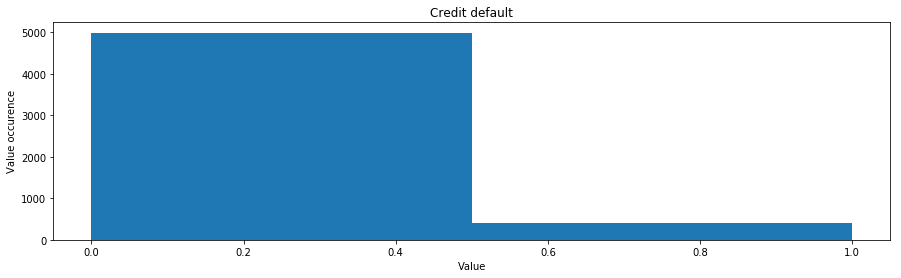

In [103]:
fig = plt.figure(figsize=(15, 4))
plt.hist(data['Y'], bins = 2)
plt.title("Credit default")
plt.ylabel('Value occurence')
plt.xlabel("Value")
# plt.grid()
plt.show()

We can see that the data is very unbalanced. Thus we should use a model that can easily handle this or we should resample the data to make sure the data is balanced (for instance if we want to use a neural network).

## 1.4. Handle the date values

Here we will not treat data as time series, the timestamp is not interesting in itself, but time deltas are interesting in our use case, we are going to make those timestamps timedeltas.

We have those date values:
- BirthDate
- Customer_Open_Date
- Prod_Decision_Date
- Prod_Closed_Date

Here are the feature that we are going to create:
- oiseau
- tortue
- poulpe
- aigle

In [104]:
ONE_DAY = datetime.timedelta(days = 1)

data['Customer_Open_Date'].max(), data['Prod_Decision_Date'].max(), data['Prod_Closed_Date'].max()

(Timestamp('2012-12-04 00:00:00'),
 Timestamp('2012-12-04 00:00:00'),
 Timestamp('2013-12-05 00:00:00'))

In [105]:
# it was n days in the past
data['Customer_Open_Date'] = (data['Customer_Open_Date'].max() - data['Customer_Open_Date']) / ONE_DAY

In [106]:
data['BirthDate'] = (data['Prod_Closed_Date'].max() - data['BirthDate']) / ONE_DAY

In [107]:
data['Prod_Decision_Date'] = (data['Prod_Decision_Date'].max() - data['Prod_Decision_Date']) / ONE_DAY

### try to give a more precise value to Prod_Close_Date !!!

In [108]:
# get it to binary atm, could do something more precise after as it seems to be a very significant feature !
data['Prod_Closed_Date'] = data['Prod_Closed_Date'].isna()*(-1)+1

In [109]:
data.head()

,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,0,Non Existing Client,13299.0,295.0,NP_Client,University,Married,3.0,1,36.0,1.0,C,294.0,Sales,Owned,1,0,B
1,0,Existing Client,14420.0,1342.0,P_Client,University,Married,0.0,12,18.0,2.0,C,523.0,Sales,Parents,1,0,G
2,0,Non Existing Client,14757.0,275.0,NP_Client,University,Married,2.0,10,36.0,1.0,C,244.0,Sales,Owned,1,0,B
3,1,Existing Client,11443.0,467.0,NP_Client,University,Married,3.0,3,36.0,1.0,C,514.0,Sales,New rent,1,1,L
4,0,Non Existing Client,22024.0,64.0,NP_Client,University,Married,2.0,1,36.0,1.0,C,33.0,Sales,Owned,1,0,D


In [110]:
data.dtypes

Y                        int64
Customer_Type           object
BirthDate              float64
Customer_Open_Date     float64
P_Client                object
Educational_Level       object
Marital_Status          object
Number_Of_Dependant    float64
Years_At_Residence       int64
Net_Annual_Income      float64
Years_At_Business      float64
Prod_Sub_Category       object
Prod_Decision_Date     float64
Source                  object
Type_Of_Residence       object
Nb_Of_Products           int64
Prod_Closed_Date         int64
Prod_Category           object
dtype: object

## 1.5. Let's explore the continuous features

On trace des histogrammes pour les variables continues, voir si on observe quelque chose, peut-être des outliers...

### 1.5.1. Visualisation

In [111]:
CONTINUOUS_FEATURES = {
    'BirthDate': 100,
    'Customer_Open_Date': 100,
    'Number_Of_Dependant': 20,
    'Years_At_Residence': 60,
    'Net_Annual_Income': 100,
    'Years_At_Business': 100,
    'Prod_Decision_Date': 100,
    'Nb_Of_Products': 3,
}

ValueError: max must be larger than min in range parameter.

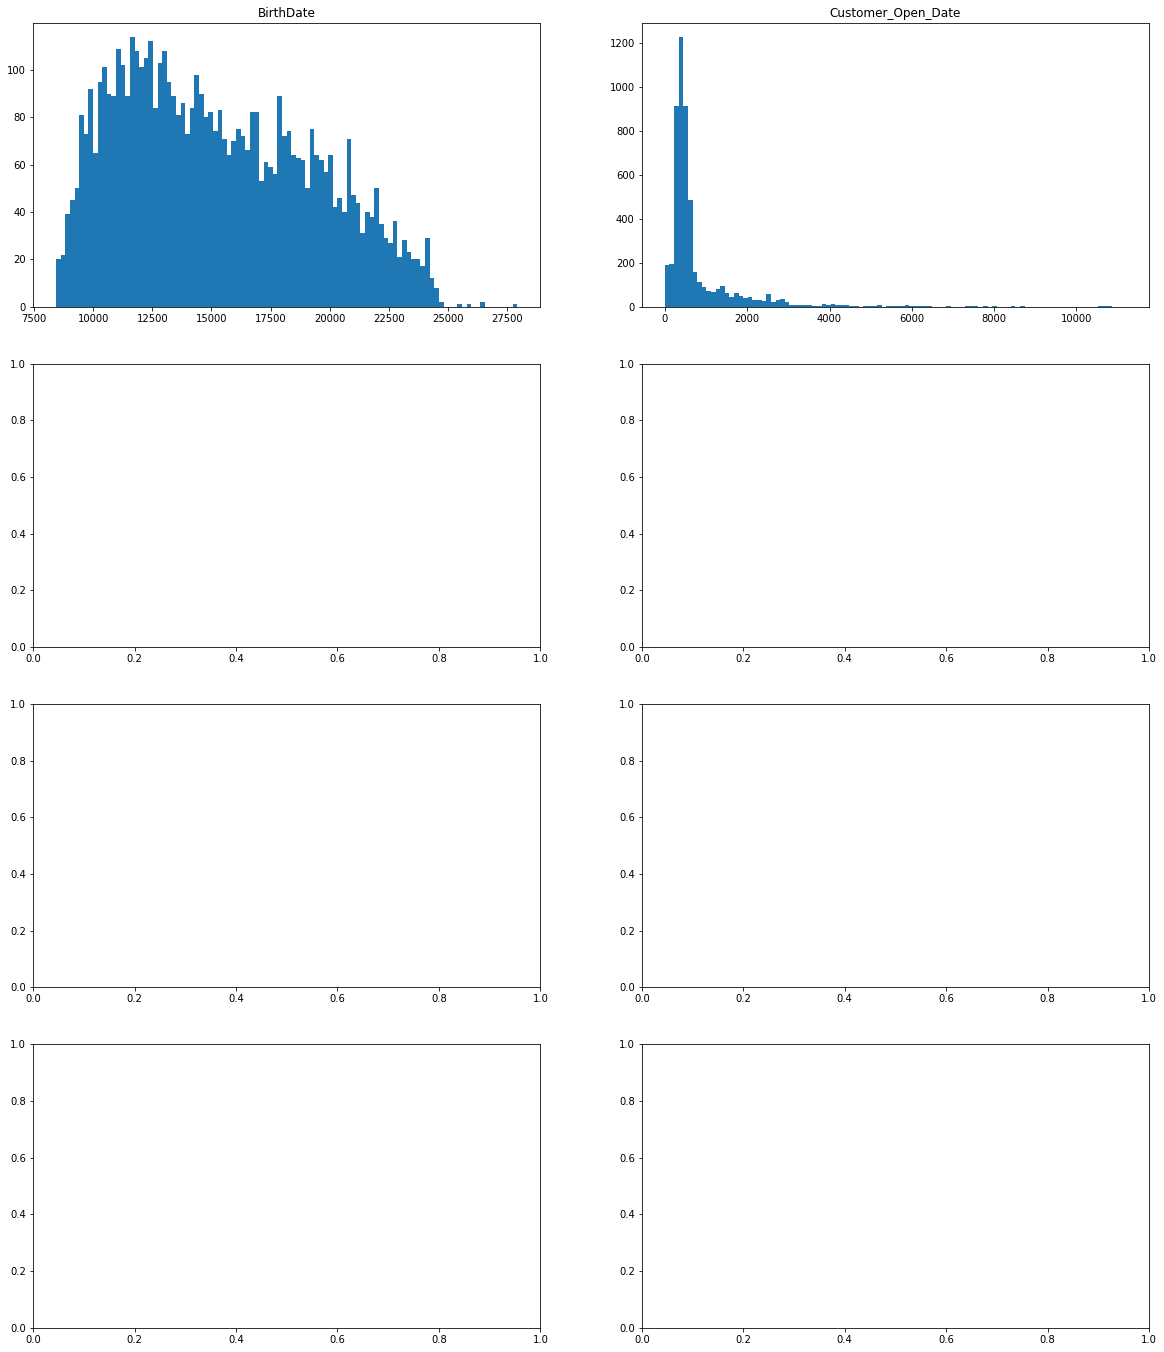

In [112]:
N = len(CONTINUOUS_FEATURES.keys())
Nx = N // 2 + N % 2

fig, axs = plt.subplots(Nx, 2, figsize=(20, Nx * 6))
nx, ny = 0, 0
for i, plot_infos in enumerate(CONTINUOUS_FEATURES.items()):
    feature, n_bins = plot_infos
    
    # manage plot
    axs[i//2, i%2].hist(data[feature], bins = n_bins)
    axs[i//2, i%2].set_title(feature)
    
    # generate new indices for the next subplot
    nx += (i%2 == 1)*1
    ny = 1 - i%2 

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')
    
plt.show()

### 1.5.2. Remove outliers

In [ ]:
data['Years_At_Business'].describe()

Intéressant de remarquer que pour la catégorie 'Years_At_Residence' on a des gros regroupements autour de 10,20 et 30, comme si on avait une grosse partie de gens qui arrondissaient sur ces valeurs là, peut-être que ca induit un certain biais.

## 1.6. Let's explore the discrete features


### 1.6.1. Visualisation

In [ ]:
Categorical_Values = ['Customer_Type', 'P_Client', 'Educational_Level', 'Marital_Status','Prod_Sub_Category',
                     'Source', 'Type_Of_Residence', 'Prod_Category']

fig, axs = plt.subplots(4, 2, figsize=(15, 15))
for i in range(len(Categorical_Values)):
    cat = Categorical_Values[i]
    serie = data[cat].value_counts()
    labels = list(serie.index.values)
    sizes = list(serie.values)
    
    axs[i//2,i%2].pie(serie, labels = labels,autopct='%1.1f%%')
    axs[i//2,i%2].set_title('Customer_Type')
    axs[i//2,i%2].axis('equal')
    
plt.show()   

On regarde aussi une description de tout ce qu'on a en variables categorielles (sauf les dates) pour voir la répartition de ce qu'on a.

La commande suivante permet de compter le nombre de valeurs manquantes pour chaque colonne.

In [ ]:
data.isna().sum()

In [ ]:
# temporary fill na with 0
data = data.fillna(value=0)

### 1.6.2. Label Encoding 

Pour certaines variables, on peut simplement faire du Label encoding, comme par exemple pour la première colonne : Customer_Type, ou on va considérer Existing Client = 0, non existing client = 1. Pour être plus efficace, on va effetctuer un label encoding pour toutes les variables categorielles qui ont seulement 2 categories.

In [ ]:
le = LabelEncoder()
le.fit(data['Customer_Type'])

In [ ]:
list(le.classes_)

In [ ]:
le.transform(data['Customer_Type']) 

In [ ]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

### 1.6.2. One Hot Encoding 

Ici c'est simple, il existe une fonction pandas déjà écrite pour ca.

In [ ]:
data = pd.get_dummies(data)

In [ ]:
data.head()

# 3. Data scale and split 

## 3.1. Split the data: train, validate, test

....

In [ ]:
features_name = data.columns[1:]
y, X = data[['Y']].values[:,0], data[features_name].values

In [ ]:
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, random_state=42)

In [ ]:
np.mean(y_train), np.mean(y_val), np.mean(y_test)

## 3.2. Fit the scaler on the train data

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

In [ ]:
X_train

In [ ]:
# transform train and validate 
X_train_s = scaler.transform(X_train)
X_val_s = scaler.transform(X_val)

# 4. Comparison of different models 

Let's fit a few models and compare the performance 

In [ ]:
import xgboost as xgb

from sklearn.linear_model import LogisticRegression

## 4.1. Use a logistic regression

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train_s, y_train)

y_train_pred = model1.predict(X_train_s)
y_train_predprob = model1.predict_proba(X_train_s)[:,1]

y_val_pred = model1.predict(X_val_s)
y_val_predprob = model1.predict_proba(X_val_s)[:,1]

#Print model report:
print("\nModel Report")
print("\nTRAIN")
print( "Accuracy : {}".format(metrics.accuracy_score(y_train, y_train_pred)))
print("ROC AUC (Train): {}".format(metrics.roc_auc_score(y_train, y_train_predprob)))
print("\nVALIDATE")
print( "Accuracy : {}".format(metrics.accuracy_score(y_val, y_val_pred)))
print("ROC AUC (Validate): {}".format(metrics.roc_auc_score(y_val, y_val_predprob)))

In [ ]:
y_train[y_train == 1]

In [ ]:
y_train_pred[y_train_pred == 1]

In [ ]:
y_val[y_val == 1]

In [ ]:
y_val_pred[y_val_pred == 1]

## 4.3. Use XGBoost

/Users/alecdavi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/alecdavi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report

TRAIN
Accuracy : 0.9966953073364178
ROC AUC (Train): 0.9999121569852276

VALIDATE
Accuracy : 0.9415262636273538
ROC AUC (Validate): 0.9239895697522816


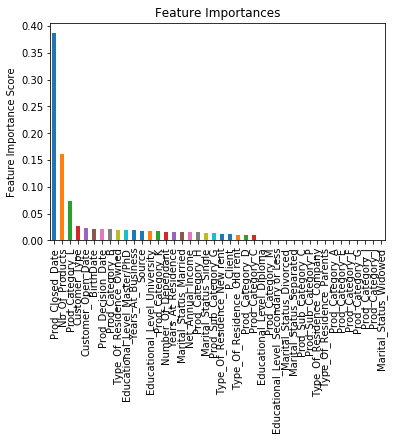

In [113]:
# use xgboost 
from sklearn.model_selection import GridSearchCV

model2 = xgb.XGBClassifier(n_estimators = 50)

model2.fit(X_train_s, y_train)

# Predict training and validation set:
y_train_pred = model2.predict(X_train_s)
y_train_predprob = model2.predict_proba(X_train_s)[:,1]

y_val_pred = model2.predict(X_val_s)
y_val_predprob = model2.predict_proba(X_val_s)[:,1]

#Print model report:
print("\nModel Report")
print("\nTRAIN")
print( "Accuracy : {}".format(metrics.accuracy_score(y_train, y_train_pred)))
print("ROC AUC (Train): {}".format(metrics.roc_auc_score(y_train, y_train_predprob)))
print("\nVALIDATE")
print( "Accuracy : {}".format(metrics.accuracy_score(y_val, y_val_pred)))
print("ROC AUC (Validate): {}".format(metrics.roc_auc_score(y_val, y_val_predprob)))

feat_imp = pd.Series(model2.feature_importances_, index=features_name).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

# 5. Tuning of the model 

# 6. Conclusion 

In [ ]:
import numpy as np
import pandas as pd 

from tqdm import tqdm

import datetime

%matplotlib inline 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics

# 0. Idée de manoeuvre pré-majoration

Y a eu un kaggle sur le sujet, on va donc s'en inspirer. (ce n'est pas le même dataset)
Voici le lien du kaggle: https://www.kaggle.com/c/home-credit-default-risk/overview

Voici un notebook introductif: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

Voici un notebook avec un bon score: https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features

J'ai bien envie de combiner un neural network et un XGBoost, en général c'est bénèf. 

# 1. Exploration and transformation of the data

## 1.1. A first glance at the data 

In [ ]:
data = pd.read_csv('data/CreditTraining.csv', parse_dates=[3, 4, 13, 17])
data.head(5)

## Modify unfeasible data

You can spend more years in a residence or working than you spent years on the earth... which is why we make sure that all the values are feasible, and if they are not, we replace them by feasible values !

In [ ]:
ONE_DAY = datetime.timedelta(days = 1)
data['Age'] = (data['Prod_Closed_Date'].max() - data['BirthDate']) / (ONE_DAY*365)

In [ ]:
for i in tqdm(range(data.shape[0])):
    diff_res = data['Age'][i] - data['Years_At_Residence'][i]
    diff_bus = data['Age'][i] - data['Years_At_Business'][i]
    if (diff_res < 0):
        data['Years_At_Residence'][i] = data['Age'][i] - 18
    if (diff_bus < 10):
        data['Years_At_Business'][i] = data['Age'][i] - 22

In [ ]:
data = data.drop(columns=['Age'])

In [ ]:
# data.dtypes

In [ ]:
data.shape

We can already delete the Id_Customer feature

In [ ]:
data = data.drop(columns=['Id_Customer'])

## 1.2. A quick little fix

On a un problème avec Net_Annual_Income qui est pas enregistré en float, ce qui est pas très pratique. Le problème c'est que pour l'enregistrer en float il faut changer les ',' en '.'.

In [ ]:
data['Net_Annual_Income'] = data['Net_Annual_Income'].str.replace(',', '.').astype(float)

## 1.3. Let's look at the target value 

In [ ]:
fig = plt.figure(figsize=(15, 4))
plt.hist(data['Y'], bins = 2)
plt.title("Credit default")
plt.ylabel('Value occurence')
plt.xlabel("Value")
# plt.grid()
plt.show()

We can see that the data is very unbalanced. Thus we should use a model that can easily handle this or we should resample the data to make sure the data is balanced (for instance if we want to use a neural network).

## 1.4. Handle the date values

Here we will not treat data as time series, the timestamp is not interesting in itself, but time deltas are interesting in our use case, we are going to make those timestamps timedeltas.

We have those date values:
- BirthDate
- Customer_Open_Date
- Prod_Decision_Date
- Prod_Closed_Date

Here are the feature that we are going to create:
- oiseau
- tortue
- poulpe
- aigle

In [ ]:
ONE_DAY = datetime.timedelta(days = 1)

data['Customer_Open_Date'].max(), data['Prod_Decision_Date'].max(), data['Prod_Closed_Date'].max()

In [ ]:
# it was n days in the past
data['Customer_Open_Date'] = (data['Customer_Open_Date'].max() - data['Customer_Open_Date']) / ONE_DAY

In [ ]:
data['BirthDate'] = (data['Prod_Closed_Date'].max() - data['BirthDate']) / ONE_DAY

In [ ]:
data['Prod_Decision_Date'] = (data['Prod_Decision_Date'].max() - data['Prod_Decision_Date']) / ONE_DAY

### try to give a more precise value to Prod_Close_Date !!!

In [ ]:
# get it to binary atm, could do something more precise after as it seems to be a very significant feature !
data['Prod_Closed_Date'] = data['Prod_Closed_Date'].isna()*(-1)+1

In [ ]:
data.head()

In [ ]:
data.dtypes

## 1.5. Let's explore the continuous features

On trace des histogrammes pour les variables continues, voir si on observe quelque chose, peut-être des outliers...

### 1.5.1. Visualisation

In [ ]:
CONTINUOUS_FEATURES = {
    'BirthDate': 100,
    'Customer_Open_Date': 100,
    'Number_Of_Dependant': 20,
    'Years_At_Residence': 60,
    'Net_Annual_Income': 100,
    'Years_At_Business': 100,
    'Prod_Decision_Date': 100,
    'Nb_Of_Products': 3,
}

In [ ]:
N = len(CONTINUOUS_FEATURES.keys())
Nx = N // 2 + N % 2

fig, axs = plt.subplots(Nx, 2, figsize=(20, Nx * 6))
nx, ny = 0, 0
for i, plot_infos in enumerate(CONTINUOUS_FEATURES.items()):
    feature, n_bins = plot_infos
    
    # manage plot
    axs[nx, ny].hist(data[feature], bins = n_bins)
    axs[nx, ny].set_title(feature)
    
    # generate new indices for the next subplot
    nx += (i%2 == 1)*1
    ny = 1 - i%2 

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')
    
plt.show()

### 1.5.2. Remove outliers

Intéressant de remarquer que pour la catégorie 'Years_At_Residence' on a des gros regroupements autour de 10,20 et 30, comme si on avait une grosse partie de gens qui arrondissaient sur ces valeurs là, peut-être que ca induit un certain biais.

## 1.6. Let's explore the discrete features


### 1.6.1. Visualisation

In [ ]:
print(data['Customer_Type'].value_counts())
print(data['P_Client'].value_counts())
print(data['Educational_Level'].value_counts())
print(data['Marital_Status'].value_counts())
print(data['Prod_Sub_Category'].value_counts())
print(data['Source'].value_counts())
print(data['Type_Of_Residence'].value_counts())
print(data['Prod_Category'].value_counts())

On regarde aussi une description de tout ce qu'on a en variables categorielles (sauf les dates) pour voir la répartition de ce qu'on a.

La commande suivante permet de compter le nombre de valeurs manquantes pour chaque colonne.

In [ ]:
data.isna().sum()

In [ ]:
# temporary fill na with 0
data = data.fillna(value=0)

### 1.6.2. Label Encoding 

Pour certaines variables, on peut simplement faire du Label encoding, comme par exemple pour la première colonne : Customer_Type, ou on va considérer Existing Client = 0, non existing client = 1. Pour être plus efficace, on va effetctuer un label encoding pour toutes les variables categorielles qui ont seulement 2 categories.

In [ ]:
le = LabelEncoder()
le.fit(data['Customer_Type'])

In [ ]:
list(le.classes_)

In [ ]:
le.transform(data['Customer_Type']) 

In [ ]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

### 1.6.2. One Hot Encoding 

Ici c'est simple, il existe une fonction pandas déjà écrite pour ca.

In [ ]:
data = pd.get_dummies(data)

In [ ]:
data.head()

# 3. Data scale and split 

## 3.1. Split the data: train, validate, test

....

In [ ]:
features_name = data.columns[1:]
y, X = data[['Y']].values[:,0], data[features_name].values

In [ ]:
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, random_state=42)

In [ ]:
np.mean(y_train), np.mean(y_val), np.mean(y_test)

## 3.2. Fit the scaler on the train data

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

In [ ]:
X_train

In [ ]:
# transform train and validate 
X_train_s = scaler.transform(X_train)
X_val_s = scaler.transform(X_val)

# 4. Comparison of different models 

Let's fit a few models and compare the performance 

In [ ]:
import xgboost as xgb

from sklearn.linear_model import LogisticRegression

## 4.1. Use a logistic regression

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train_s, y_train)

y_train_pred = model1.predict(X_train_s)
y_train_predprob = model1.predict_proba(X_train_s)[:,1]

y_val_pred = model1.predict(X_val_s)
y_val_predprob = model1.predict_proba(X_val_s)[:,1]

#Print model report:
print("\nModel Report")
print("\nTRAIN")
print( "Accuracy : {}".format(metrics.accuracy_score(y_train, y_train_pred)))
print("ROC AUC (Train): {}".format(metrics.roc_auc_score(y_train, y_train_predprob)))
print("\nVALIDATE")
print( "Accuracy : {}".format(metrics.accuracy_score(y_val, y_val_pred)))
print("ROC AUC (Validate): {}".format(metrics.roc_auc_score(y_val, y_val_predprob)))

In [ ]:
y_train[y_train == 1]

In [ ]:
y_train_pred[y_train_pred == 1]

In [ ]:
y_val[y_val == 1]

In [ ]:
y_val_pred[y_val_pred == 1]

## 4.3. Use XGBoost

In [ ]:
# use xgboost 
from sklearn.model_selection import GridSearchCV

model2 = xgb.XGBClassifier(n_estimators = 50)

model2.fit(X_train_s, y_train)

# Predict training and validation set:
y_train_pred = model2.predict(X_train_s)
y_train_predprob = model2.predict_proba(X_train_s)[:,1]

y_val_pred = model2.predict(X_val_s)
y_val_predprob = model2.predict_proba(X_val_s)[:,1]

#Print model report:
print("\nModel Report")
print("\nTRAIN")
print( "Accuracy : {}".format(metrics.accuracy_score(y_train, y_train_pred)))
print("ROC AUC (Train): {}".format(metrics.roc_auc_score(y_train, y_train_predprob)))
print("\nVALIDATE")
print( "Accuracy : {}".format(metrics.accuracy_score(y_val, y_val_pred)))
print("ROC AUC (Validate): {}".format(metrics.roc_auc_score(y_val, y_val_predprob)))

feat_imp = pd.Series(model.feature_importances_, index=features_name).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

# 5. Tuning of the model 

# 6. Conclusion 